In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

2024-03-15 12:03:04.088334: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [3]:
class NeuralNetwork:
   def __init__(self, input_shape, num_classes):
       self.model = self.build_model(input_shape, num_classes)
   def build_model(self, input_shape, num_classes):
       model = models.Sequential()
       model.add(layers.Flatten(input_shape=input_shape))
       model.add(layers.Dense(128, activation='relu'))
       model.add(layers.Dense(64, activation='relu'))
       model.add(layers.Dense(num_classes, activation='softmax'))
       model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
       return model
 
   def train(self, train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1):
       history = self.model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, validation_split=validation_split)
       return history
   def evaluate(self, test_images, test_labels):
       return self.model.evaluate(test_images, test_labels)
   def predict(self, images):
       return self.model.predict(images)

In [4]:
input_shape = (28, 28, 1)
num_classes = 10
nn = NeuralNetwork(input_shape, num_classes)
history = nn.train(train_images, train_labels, epochs=5)

Epoch 1/5
844/844 [==============================] - 3s 2ms/step - loss: 0.2958 - accuracy: 0.9149 - val_loss: 0.1324 - val_accuracy: 0.9627
Epoch 2/5
844/844 [==============================] - 2s 3ms/step - loss: 0.1223 - accuracy: 0.9634 - val_loss: 0.0948 - val_accuracy: 0.9717
Epoch 3/5
844/844 [==============================] - 2s 3ms/step - loss: 0.0857 - accuracy: 0.9739 - val_loss: 0.0882 - val_accuracy: 0.9748
Epoch 4/5
844/844 [==============================] - 2s 2ms/step - loss: 0.0635 - accuracy: 0.9807 - val_loss: 0.0844 - val_accuracy: 0.9758
Epoch 5/5
844/844 [==============================] - 2s 2ms/step - loss: 0.0504 - accuracy: 0.9839 - val_loss: 0.0831 - val_accuracy: 0.9767


In [5]:
test_loss, test_acc = nn.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 0s 1ms/step - loss: 0.0851 - accuracy: 0.9743
Test accuracy: 0.9743000268936157


In [18]:
n=550
predictions2 = [test_images[n:n+5],nn.predict(test_images[n:n+5])]

1/1 [==============================] - 0s 27ms/step


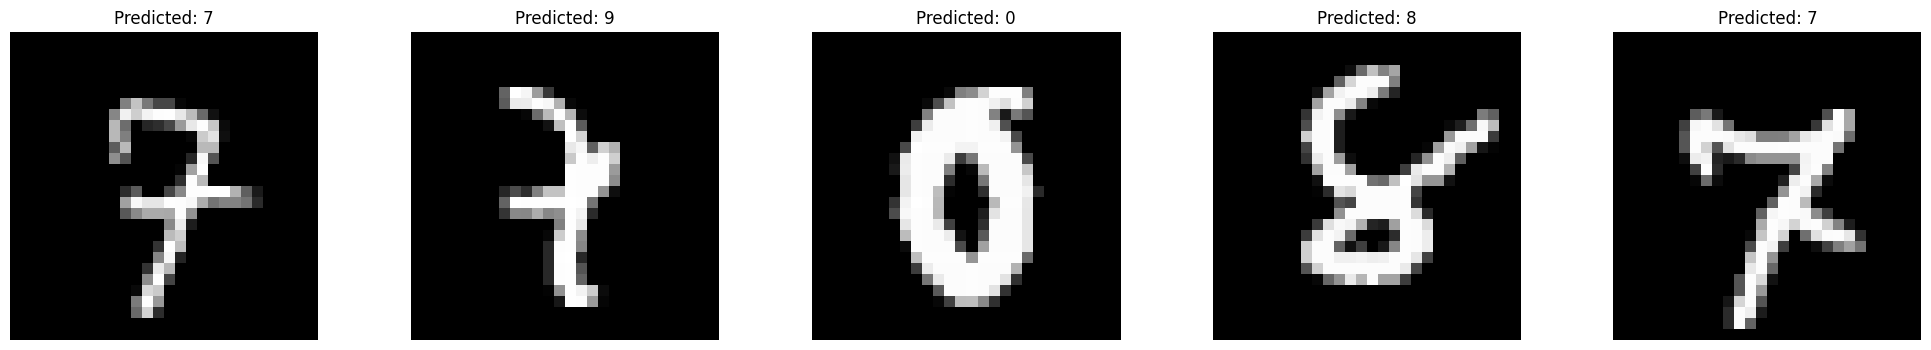

In [19]:
plt.figure(figsize=(25, 4))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img_data = predictions2[0][i].reshape(28, 28)
    plt.imshow(img_data, cmap='gray')
    plt.title(f'Predicted: {tf.argmax(predictions2[1][i])}')
    plt.axis('off')
plt.show()